# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [2]:
import pandas as pd

In [3]:
from pandas import DataFrame

In [4]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xlrd==1.2.0

데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/project/Toy_Project_보스턴주택가격/BostonHousing.xls')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

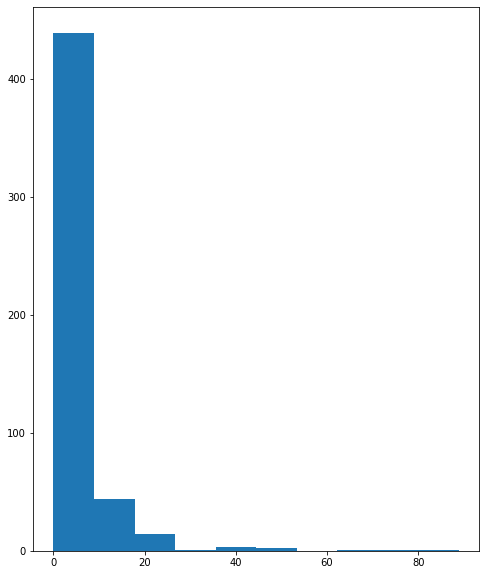

In [ ]:

plt.figure(figsize=(8, 10))
plt.hist(df["CRIM"], bins=10 )


In [ ]:
x= df.loc[0:, ["CRIM", "RM", "TAX", "LSTAT", "ZN"]]
x

,CRIM,RM,TAX,LSTAT,ZN
0,0.00632,6.575,296,4.98,18.0
1,0.02731,6.421,242,9.14,0.0
2,0.02729,7.185,242,4.03,0.0
3,0.03237,6.998,222,2.94,0.0
4,0.06905,7.147,222,5.33,0.0
...,...,...,...,...,...
501,0.06263,6.593,273,9.67,0.0
502,0.04527,6.120,273,9.08,0.0
503,0.06076,6.976,273,5.64,0.0
504,0.10959,6.794,273,6.48,0.0


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info() #누락된 정보가 있는지 확인하고 데이터를 한눈에 먼저 파악한다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


## 데이터 분포 확인하기

In [ ]:
#내가 생각하기에 주택가격에 영향을 분명하게 끼칠 것이라고 여기는 요소를 정해보겠다.
#- crime, rad, tax, lstat, rm
#이 요소 때문에 주택가격에 영향을 끼칠지 안 끼칠지 감도 안오는 요소 
#- chas, indus, ptratio, nox, age, nox

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [ ]:
#먼저 집값과 살인율의 관련 정도를 파악하기 
print(df["CRIM"].mean())
print(df["CRIM"].max())
print(df["CRIM"].min())
print(df["MEDV"].mean())
print(df["MEDV"].max())
print(df["MEDV"].min())

3.6135235573122535
88.9762
0.00632
22.532806324110698
50.0
5.0


In [ ]:
import seaborn as sns

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


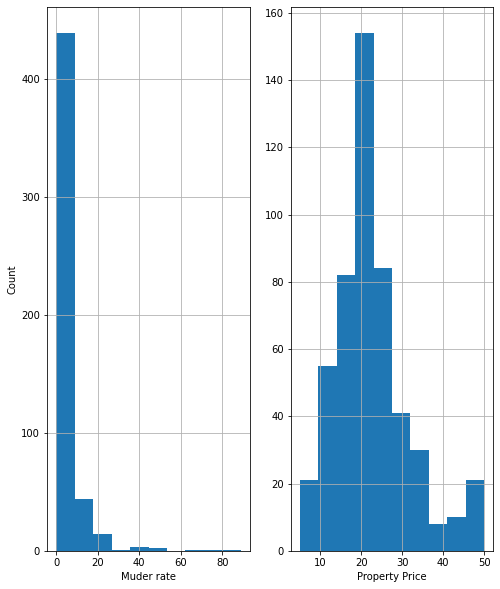

In [ ]:
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1)
plt.hist(df["CRIM"], bins=10 )
plt.xlabel("Muder rate")
plt.ylabel("Count")
plt.grid()
plt.subplot(1,2,2)
plt.hist(df["MEDV"], bins=10)
plt.xlabel("Property Price")
plt.grid()
plt.show()

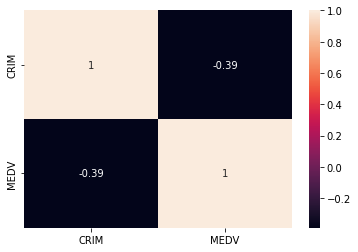

In [ ]:
a = df[["CRIM", "MEDV"]].corr()
sns.heatmap(a, annot=True)

In [ ]:
print(df["CRIM"].describe())
print(df['MEDV'].describe())
x =df["CRIM"]
y = df["MEDV"]

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


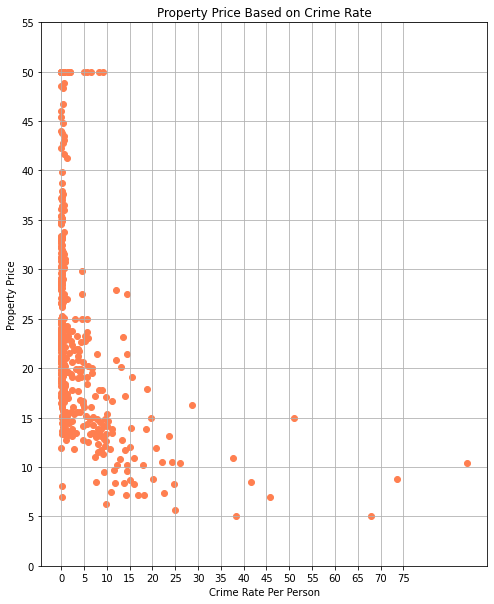

In [ ]:
plt.figure(figsize=(8, 10))
plt.scatter(x, y, color="coral")
plt.yticks([num for num in range(0, 60, 5)])
plt.xticks([num for num in range(0, 80, 5)])
plt.grid()
plt.xlabel("Crime Rate Per Person")
plt.ylabel("Property Price")
plt.title("Property Price Based on Crime Rate", loc="center")
plt.show()

In [ ]:
df["CRIM_ClASS"] = ['GOOD' if df['CRIM'] <= 5 
                    elif if df['CRIM'] <= 10 else 'BAD' for n in df["CRIM"]

TypeError: ignored

In [ ]:
#def f(x):
  if x < 22:
    return "Mere"
  elif 22 < x < 44:
    return "NORMAL"
  elif 44 < x < 66:
    return "NO GOOD"
  else:
    return "PRETTY BAD"
#df.map(f)


IndentationError: ignored

In [ ]:
#방 갯수와 집 값의 관계 파악하기 
print(df[["MEDV","RM"]].describe())
print(df[["MEDV","RM"]].corr())

             MEDV          RM
count  506.000000  506.000000
mean    22.532806    6.284634
std      9.197104    0.702617
min      5.000000    3.561000
25%     17.025000    5.885500
50%     21.200000    6.208500
75%     25.000000    6.623500
max     50.000000    8.780000
         MEDV       RM
MEDV  1.00000  0.69536
RM    0.69536  1.00000


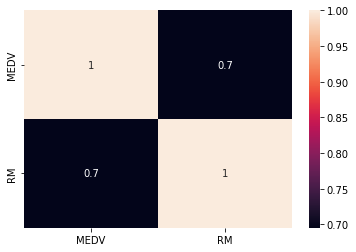

In [ ]:
sns.heatmap(df[["MEDV","RM"]].corr(), annot=True)

In [ ]:
#주택 가격과 방 갯수에 관계를 알아보자! 

<Figure size 576x720 with 0 Axes>

In [ ]:
df[["MEDV", "RM"]].describe()

,MEDV,RM
count,506.000000,506.000000
mean,22.532806,6.284634
std,9.197104,0.702617
min,5.000000,3.561000
25%,17.025000,5.885500
50%,21.200000,6.208500
75%,25.000000,6.623500
max,50.000000,8.780000


         MEDV       RM
MEDV  1.00000  0.69536
RM    0.69536  1.00000


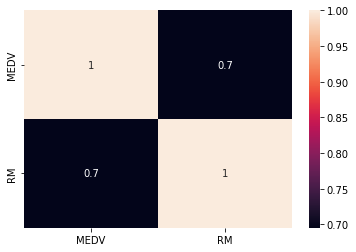

In [ ]:
print(df[["MEDV", "RM"]].corr())
sns.heatmap(df[["MEDV","RM"]].corr(), annot=True)

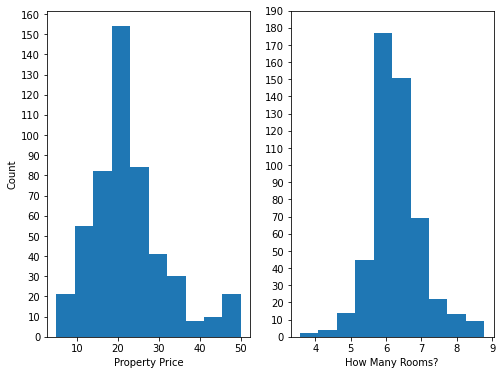

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.yticks([num for num in range(0, 170, 10)])
plt.hist(df["MEDV"])
plt.xlabel("Property Price")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(df["RM"])
plt.yticks([num for num in range(0, 200, 10)])
plt.xlabel("How Many Rooms?")
plt.show()

In [1]:
plt.figure(figsize=(8,6))
plt.scatter(x= df["MEDV"], y=df["RM"], color="coral")
plt.grid()
plt.title("Property Price Based on Room Number")
plt.ylim(0, 10)
plt.xlim(0, 55)
plt.xlabel("Property Price")
plt.ylabel("Roon Number")
plt.show()

NameError: ignored

In [ ]:
#TAX와 집값의 관계 정리하고 분석하기 

In [ ]:
df[["MEDV","TAX"]].describe()

,MEDV,TAX
count,506.000000,506.000000
mean,22.532806,408.237154
std,9.197104,168.537116
min,5.000000,187.000000
25%,17.025000,279.000000
50%,21.200000,330.000000
75%,25.000000,666.000000
max,50.000000,711.000000


          MEDV       TAX
MEDV  1.000000 -0.468536
TAX  -0.468536  1.000000


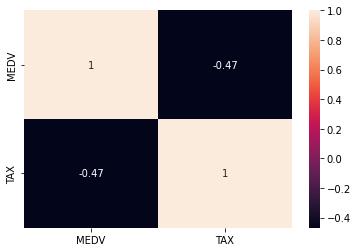

In [ ]:
print(df[["MEDV", "TAX"]].corr())
sns.heatmap(df[["MEDV", "TAX"]].corr(), annot=True)

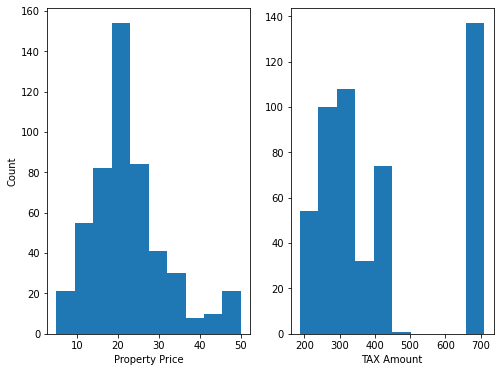

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.hist(df["MEDV"])
plt.xlabel("Property Price")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(df["TAX"])
plt.xlabel("TAX Amount")
plt.show()

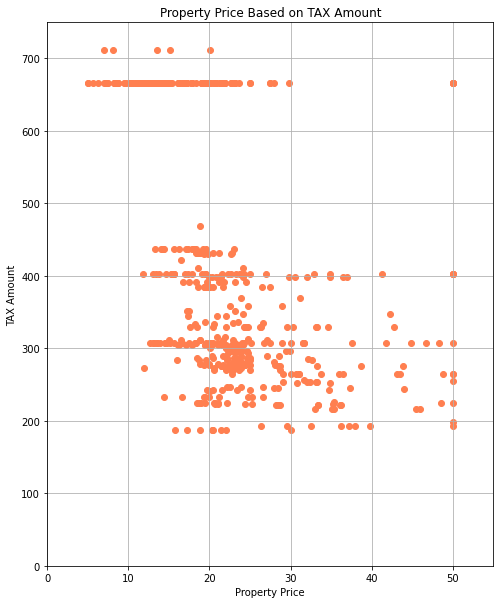

In [ ]:
plt.figure(figsize=(8,10))
plt.scatter(x= df["MEDV"], y=df["TAX"], color="coral")
plt.grid()
plt.title("Property Price Based on TAX Amount")
plt.ylim(0, 750)
plt.xlim(0, 55)
plt.xlabel("Property Price")
plt.ylabel("TAX Amount")
plt.show()

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>